In [91]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import math as math

## **Common Function declarations**

In [92]:
# Understand & Explain properly 
def standardization(data):
    return (data-data.mean())/data.std()

def normalization(data):
    return (data-data.min())/(data.max()-data.min())

# **Climate Data Set**


## **0. Loading Climate Dataset**

In [93]:
columnNames = ['Min_Temp','Max_Temp','Mean_Temp','Min_Humidity','Max_Humidity','Mean_Humidity',
               'Min_Pressure','Max_Pressure','Mean_Pressure','Precipitation','Snowfall_Amount','Sunshine_Duration',
               'Min_WindGust','Max_WindGust','Mean_WindGust','Min_WindSpeed','Max_WindSpeed','Mean_WindSpeed']

climateDataBasel = pd.read_csv("ClimateDataBasel.csv", header=None, names=columnNames) 
#[shape = 1763 rows x 18 columns]
#climateDataBasel

In [94]:
# Just checking top 5 rows and column names
climateDataBasel.head()

,Min_Temp,Max_Temp,Mean_Temp,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Pressure,Max_Pressure,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Min_WindGust,Max_WindGust,Mean_WindGust,Min_WindSpeed,Max_WindSpeed,Mean_WindSpeed
0,8.100529,17.570530,13.445111,61,96,77.875000,1013.1,1018.4,1015.75830,0.2,0.0,350.56274,3.240000,23.400000,12.210002,1.787066,10.403253,6.639939
1,11.110529,18.490528,14.988861,59,94,76.458336,1013.9,1016.6,1014.99170,1.9,0.0,287.23404,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541
2,10.320529,18.170528,14.267612,71,96,83.583336,1015.3,1017.5,1016.38745,0.1,0.0,126.26506,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418
3,10.450529,24.980530,17.309278,54,92,77.625000,1015.9,1018.7,1017.26250,0.0,0.0,881.24710,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738
4,12.350529,25.610529,19.881780,47,88,66.583336,1015.7,1020.7,1018.18353,0.0,0.0,951.56665,0.720000,15.840000,5.565001,0.376747,6.443357,3.311275


In [95]:
#cleanData.style.background_gradient(cmap='coolwarm').set_precision(2)


## **1. Missing values**



> Check if there are any missing values


In [96]:
climateDataBasel.isnull().sum()

Min_Temp             0
Max_Temp             0
Mean_Temp            0
Min_Humidity         0
Max_Humidity         0
Mean_Humidity        0
Min_Pressure         0
Max_Pressure         0
Mean_Pressure        0
Precipitation        0
Snowfall_Amount      0
Sunshine_Duration    0
Min_WindGust         0
Max_WindGust         0
Mean_WindGust        0
Min_WindSpeed        0
Max_WindSpeed        0
Mean_WindSpeed       0
dtype: int64

As can be seen from the table, there are no missing values in any columns in our dataset. 

## *Check distribution*

In [97]:
climateDataBasel.describe()

,Min_Temp,Max_Temp,Mean_Temp,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Pressure,Max_Pressure,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Min_WindGust,Max_WindGust,Mean_WindGust,Min_WindSpeed,Max_WindSpeed,Mean_WindSpeed
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,8.738776,16.779298,12.717350,54.092456,87.004538,71.040509,1014.690925,1020.364492,1017.576393,1.502893,0.068015,399.168240,7.235326,30.464208,17.567084,2.932845,14.858762,8.418839
std,7.803700,9.647769,8.788555,12.949827,7.892077,10.012178,8.848251,8.014133,8.282298,3.496710,0.513935,294.660868,8.221851,16.491422,11.504750,3.470768,7.871249,5.205606
min,-12.519471,-4.389471,-7.628221,19.000000,53.000000,38.333332,976.100000,981.400000,978.450000,0.000000,0.000000,0.000000,0.000000,4.320000,2.715000,0.000000,2.881557,1.495064
25%,1.700529,8.200529,4.689279,44.000000,82.000000,63.520834,1010.300000,1015.900000,1013.233400,0.000000,0.000000,123.972160,2.160000,19.080000,9.765000,0.842431,9.304952,4.872080
50%,10.210529,17.400530,14.618446,54.000000,88.000000,72.000000,1014.600000,1019.500000,1016.954040,0.000000,0.000000,387.746280,4.320000,26.280000,14.145000,1.864800,12.988194,6.939507
75%,15.530529,25.190529,20.432405,64.000000,93.000000,78.750000,1019.300000,1024.400000,1021.760405,1.200000,0.000000,619.156720,8.820000,37.440000,21.667500,3.729600,18.398964,10.108294
max,25.820530,36.700527,30.425112,93.000000,100.000000,95.250000,1043.600000,1049.900000,1047.095800,37.399994,13.860001,962.283300,57.960000,133.200000,90.749990,26.673279,59.192370,36.360706


In [164]:
from scipy import stats as stats
normal_test = stats.normaltest(climateDataBasel)
normal_test.pvalue[normal_test.pvalue >0.5]

array([], dtype=float64)

We get the p-values for the distribution of each feature in our dataset. And we can see that, none of the columns have a p-value >0.5. Hence we reject the hypothesis that the column follows Gaussian distribution. 

Using Central Limit Theorem, we can approximate the data to follow Gaussian distribution. As n -> infinity, the variables will follow normal distribution. Hence, we proceed with the assumption that the data is normally distributed.


## **2. Standardization**

In [99]:
standard_df = standardization(climateDataBasel)
standard_df

,Min_Temp,Max_Temp,Mean_Temp,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Pressure,Max_Pressure,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Min_WindGust,Max_WindGust,Mean_WindGust,Min_WindSpeed,Max_WindSpeed,Mean_WindSpeed
0,-0.081788,0.082012,0.082808,0.533408,1.139809,0.682618,-0.179801,-0.245128,-0.219515,-0.372605,-0.132341,-0.164954,-0.485940,-0.428357,-0.465641,-0.330123,-0.566049,-0.341728
1,0.303927,0.177371,0.258462,0.378966,0.886391,0.541124,-0.089388,-0.469732,-0.312074,0.113566,-0.132341,-0.379875,-0.091868,-0.319209,-0.233563,0.353944,0.181234,0.037979
2,0.202693,0.144202,0.176396,1.305619,1.139809,1.252757,0.068836,-0.357430,-0.143552,-0.401204,-0.132341,-0.926160,-0.485940,-0.384698,-0.417400,-0.260462,-0.453414,-0.393119
3,0.219351,0.850065,0.522490,-0.007140,0.632972,0.657648,0.136646,-0.207695,-0.037899,-0.429802,-0.132341,1.636046,-0.617297,-0.624822,-0.702934,-0.614747,-0.428867,-0.716170
4,0.462826,0.915365,0.815200,-0.547687,0.126134,-0.445175,0.114042,0.041864,0.073305,-0.429802,-0.132341,1.874692,-0.792440,-0.886777,-1.043228,-0.736465,-1.069132,-0.981166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-0.330388,-0.691224,-0.568607,2.155051,0.886391,1.643947,1.232908,1.788778,1.266075,1.000114,-0.132341,-1.354670,0.302204,0.139211,0.122377,0.245885,0.282561,0.209455
1759,-0.885253,-1.013578,-0.928877,-0.084361,1.013100,0.457892,2.261359,2.487544,2.479035,-0.429802,-0.132341,0.351849,-0.442154,-0.450186,-0.049726,-0.461237,-0.078380,0.052172
1760,-1.187673,-1.300691,-1.290000,-1.088235,-0.507412,-0.773942,2.487393,2.425154,2.479506,-0.429802,-0.132341,0.306853,-0.179440,-0.341038,-0.043207,-0.501753,-0.580427,-0.473306
1761,-1.063373,-0.934804,-1.069590,-1.011014,-2.281343,-1.760241,1.978818,2.138161,2.065466,-0.429802,-0.132341,0.386484,-0.617297,-0.297379,-0.124043,-0.768258,-0.946746,-0.932351


## **3. Global outliers - Anomaly Detection**

We use the standarized dataset to calcualate the z-scores of each feature. The Z-score shows how for away the data point is, from the mean of the distribution in terms of the number of standard deviations.




Since we know that the data does not follow Gaussian distribution, we are going to use 6(sigma) for checking the outliers.


### 6 sigma

In [ ]:
print (standard_df.applymap(lambda x: (x>= 6 or x <= -6)).sum().sum())

If we are assuming that our data will follow Gaussian distribution, we can use 3(sigma)  and check if there are any values outside [-3,3] range 

### 3 sigma

In [ ]:
print (standard_df.applymap(lambda x: (x> 3 or x < -3)).sum())

This shows that we have global outliers

In [102]:
rows = standard_df.shape[0]
cols = standard_df.shape[1]

In [174]:
cleanData = standard_df
outliersData = pd.DataFrame()
sigma = 3 # Assumption of Guassian Distribution

for i in range(cols):
  outliersData = outliersData.append(cleanData.loc[(cleanData.iloc[:,i] > sigma) | (cleanData.iloc[:,i] < -sigma)])
  cleanData = cleanData.loc[((cleanData.iloc[:,i] <sigma) & (cleanData.iloc[:,i] > -sigma))]

In [175]:
cleanData.shape

(1593, 18)

In [176]:
outliersData.shape
# Number of outliers

(170, 18)

If the data is distributed normally then 99.7% of our data data are will be within the so called 3sigma region. But using the z-score, we see that there are around 10% outliers. This is in sync with 
**Chebyshev inequality** which guarantees that guarantees that >8/9 (>90%) of standardised data will still be within [-3;3] and only 1/9 (~11% ) of the data are outliers.

In [170]:
#Inter quantile range is another way of detecting outliers.
#climateDataBasel.describe()
#sf2 = standardization(climateDataBasel)
#sf2_q25 = sf2.quantile(0.25)
#sf2_q75 = sf2.quantile(0.75)
#sf2_IQR = sf2_q75- sf2_q25
#sf2_IQR

## **4. Normalization**

Normalization to scale down the value to [0:1].

In [108]:
normalizedData = normalization(cleanData)
normalizedData.head()

,Min_Temp,Max_Temp,Mean_Temp,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Pressure,Max_Pressure,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Min_WindGust,Max_WindGust,Mean_WindGust,Min_WindSpeed,Max_WindSpeed,Mean_WindSpeed
0,0.537819,0.534437,0.553784,0.597015,0.888889,0.710717,0.479339,0.468182,0.456233,0.016807,0.0,0.364303,0.103448,0.252381,0.192694,0.136223,0.213596,0.235427
1,0.616328,0.556826,0.594352,0.567164,0.833333,0.683320,0.495868,0.427273,0.438954,0.159664,0.0,0.298492,0.206897,0.276190,0.246880,0.317204,0.380631,0.325876
2,0.595722,0.549039,0.575399,0.746269,0.888889,0.821112,0.524793,0.447727,0.470414,0.008403,0.0,0.131214,0.103448,0.261905,0.203957,0.154653,0.238773,0.223185
3,0.599113,0.714773,0.655330,0.492537,0.777778,0.705882,0.537190,0.475000,0.490137,0.000000,0.0,0.915788,0.068966,0.209524,0.137291,0.060921,0.244259,0.146233
4,0.648670,0.730105,0.722933,0.388060,0.666667,0.492345,0.533058,0.520455,0.510896,0.000000,0.0,0.988863,0.022989,0.152381,0.057839,0.028718,0.101146,0.083109


### **Comparing normalized data**

Here we are comparing two scenarios -


1.   Normalization Without standardization and outlier removal
2.   Normalization With standardization and outlier removal



In [109]:
#Normalization Without standardization and outlier removal
normalized_OriginalDataset = normalization(climateDataBasel)
normalized_OriginalDataset.head()

,Min_Temp,Max_Temp,Mean_Temp,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Pressure,Max_Pressure,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Min_WindGust,Max_WindGust,Mean_WindGust,Min_WindSpeed,Max_WindSpeed,Mean_WindSpeed
0,0.537819,0.534437,0.553784,0.567568,0.914894,0.694729,0.548148,0.540146,0.543490,0.005348,0.0,0.364303,0.055901,0.148045,0.107855,0.066998,0.133575,0.147563
1,0.616328,0.556826,0.594352,0.540541,0.872340,0.669839,0.560000,0.513869,0.532322,0.050802,0.0,0.298492,0.111801,0.162011,0.138184,0.156010,0.238031,0.204255
2,0.595722,0.549039,0.575399,0.702703,0.914894,0.795022,0.580741,0.527007,0.552655,0.002674,0.0,0.131214,0.055901,0.153631,0.114159,0.076063,0.149319,0.139890
3,0.599113,0.714773,0.655330,0.472973,0.829787,0.690337,0.589630,0.544526,0.565402,0.000000,0.0,0.915788,0.037267,0.122905,0.076844,0.029963,0.152750,0.091657
4,0.648670,0.730105,0.722933,0.378378,0.744681,0.496340,0.586667,0.573723,0.578820,0.000000,0.0,0.988863,0.012422,0.089385,0.032373,0.014124,0.063253,0.052092


In [110]:
# 'normalizedData' dataset represents Normalization With standardization and outlier removal

#Comparison
comparing_normalized_datasets = (normalized_OriginalDataset -normalizedData)

# Printing top few rows 
comparing_normalized_datasets.head()

,Min_Temp,Max_Temp,Mean_Temp,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Pressure,Max_Pressure,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Min_WindGust,Max_WindGust,Mean_WindGust,Min_WindSpeed,Max_WindSpeed,Mean_WindSpeed
0,-1.110223e-16,-1.110223e-16,0.000000e+00,-0.029447,0.026005,-0.015988,0.068809,0.071964,0.087257,-0.011459,0.0,0.000000e+00,-0.047548,-0.104336,-0.084839,-0.069225,-0.080021,-0.087864
1,0.000000e+00,0.000000e+00,0.000000e+00,-0.026624,0.039007,-0.013481,0.064132,0.086596,0.093368,-0.108862,0.0,5.551115e-17,-0.095095,-0.114179,-0.108696,-0.161194,-0.142599,-0.121621
2,0.000000e+00,0.000000e+00,-2.220446e-16,-0.043566,0.026005,-0.026090,0.055947,0.079280,0.082242,-0.005730,0.0,0.000000e+00,-0.047548,-0.108273,-0.089798,-0.078590,-0.089454,-0.083296
3,-1.110223e-16,0.000000e+00,-1.110223e-16,-0.019564,0.052009,-0.015546,0.052440,0.069526,0.075266,0.000000,0.0,1.110223e-16,-0.031698,-0.086619,-0.060446,-0.030958,-0.091509,-0.054576
4,-1.110223e-16,0.000000e+00,0.000000e+00,-0.009681,0.078014,0.003995,0.053609,0.053268,0.067923,0.000000,0.0,0.000000e+00,-0.010566,-0.062995,-0.025465,-0.014594,-0.037893,-0.031017


Since normlization brings down the scale of the dataset to [0,1], a difference of **0.1** in the values of the two datasets will show a 10% deviation between the datasets. We can check the number of columns getting heavily affected by the outliers by checking the deviation in them. Arbitrarily selecting 10% (0.1 value) as cutoff.

In [177]:
#Find any columns where the difference between the two normalized datasets is 0.1
(abs(comparing_normalized_datasets) > 0.1).any().sum()

12

For example, if we look at the Max_WindGust column, comparing the first row of the normalized data before and after removing the outliers, we see that there is an offset of around **-0.104336** for that data point. That is equivalent to ~10% offset in normalized data.

We previously noted that there are 20 outliers in the Max_WindGust column.

This shows that outliers can heavily influence the scaling of the data and disrupt further data processing.

## **5. Feature Selection**

Feature selection is needed to reduce the dimensions of our data to reduce the load on our resources and  improve the performance. If some features are not relevant to our goal or if they can be explained easily as a combination of other features, they are not needed for our final analysis and can be dropped. 

In [112]:
#g = pd.plotting.scatter_matrix(normalizedData, figsize=(cols,cols))

### **Correlation**

In [178]:
corrData = standard_df.corr()
corrData.style.background_gradient(cmap='coolwarm').set_precision(2)
#plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

,Min_Temp,Max_Temp,Mean_Temp,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Pressure,Max_Pressure,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Min_WindGust,Max_WindGust,Mean_WindGust,Min_WindSpeed,Max_WindSpeed,Mean_WindSpeed
Min_Temp,1.00,0.96,0.98,-0.42,-0.32,-0.48,-0.14,-0.32,-0.23,0.07,-0.17,0.46,-0.21,-0.28,-0.27,-0.27,-0.31,-0.32
Max_Temp,0.96,1.00,0.99,-0.57,-0.35,-0.59,-0.11,-0.28,-0.19,-0.03,-0.18,0.59,-0.27,-0.33,-0.34,-0.32,-0.36,-0.38
Mean_Temp,0.98,0.99,1.00,-0.51,-0.34,-0.55,-0.12,-0.31,-0.22,0.01,-0.18,0.55,-0.25,-0.30,-0.31,-0.30,-0.34,-0.35
Min_Humidity,-0.42,-0.57,-0.51,1.00,0.57,0.90,0.00,0.09,0.04,0.29,0.15,-0.62,0.18,0.24,0.23,0.23,0.24,0.26
Max_Humidity,-0.32,-0.35,-0.34,0.57,1.00,0.79,0.01,0.07,0.04,0.24,0.12,-0.36,-0.10,0.05,-0.03,-0.03,0.05,0.02
Mean_Humidity,-0.48,-0.59,-0.55,0.90,0.79,1.00,-0.01,0.10,0.04,0.31,0.16,-0.63,0.10,0.22,0.17,0.16,0.22,0.22
Min_Pressure,-0.14,-0.11,-0.12,0.00,0.01,-0.01,1.00,0.90,0.97,-0.29,-0.14,0.20,-0.29,-0.41,-0.38,-0.26,-0.42,-0.38
Max_Pressure,-0.32,-0.28,-0.31,0.09,0.07,0.10,0.90,1.00,0.97,-0.25,-0.07,0.07,-0.16,-0.21,-0.19,-0.12,-0.22,-0.19
Mean_Pressure,-0.23,-0.19,-0.22,0.04,0.04,0.04,0.97,0.97,1.00,-0.29,-0.11,0.15,-0.23,-0.32,-0.30,-0.20,-0.33,-0.30
Precipitation,0.07,-0.03,0.01,0.29,0.24,0.31,-0.29,-0.25,-0.29,1.00,0.20,-0.37,0.10,0.25,0.20,0.09,0.21,0.18


### ***Removing some features based on assumptions and domain understanding -***

Domain knowledge vs relationship data

In [114]:
columnsToKeep = ["Mean_Temp","Mean_Humidity", "Mean_Pressure", "Precipitation","Snowfall_Amount",	"Sunshine_Duration","Mean_WindGust", "Mean_WindSpeed"	]

In [156]:
cc = standard_df[columnsToKeep]
cc.head()

,Mean_Temp,Mean_Humidity,Mean_Pressure,Precipitation,Snowfall_Amount,Sunshine_Duration,Mean_WindGust,Mean_WindSpeed
0,0.082808,0.682618,-0.219515,-0.372605,-0.132341,-0.164954,-0.465641,-0.341728
1,0.258462,0.541124,-0.312074,0.113566,-0.132341,-0.379875,-0.233563,0.037979
2,0.176396,1.252757,-0.143552,-0.401204,-0.132341,-0.926160,-0.417400,-0.393119
3,0.522490,0.657648,-0.037899,-0.429802,-0.132341,1.636046,-0.702934,-0.716170
4,0.815200,-0.445175,0.073305,-0.429802,-0.132341,1.874692,-1.043228,-0.981166


## **6. Feature Extraction**

### **Principal Component Analysis**

PCA is needed to -

1.   Get orthogonal components



In [116]:
from sklearn.decomposition import PCA

In [117]:
#Return Pearson product-moment correlation coefficients.
#np.corrcoef(dataForPCA) 
#dataForPCA.corr()
#np.cov(dataForPCA)

In [206]:
dataForPCA = normalizedData
numberOfComponents = dataForPCA.shape[1]

In [207]:
pca = PCA(numberOfComponents)
pca.fit(dataForPCA)
transformedData = pca.transform(dataForPCA)

In [208]:
pca.explained_variance_ratio_

array([4.00731459e-01, 2.17039855e-01, 1.33719079e-01, 6.52468617e-02,
       5.55360425e-02, 3.37440960e-02, 2.77630125e-02, 2.16003429e-02,
       1.32177839e-02, 1.12811357e-02, 7.69990088e-03, 4.09376119e-03,
       2.77413460e-03, 2.24250712e-03, 1.64395399e-03, 1.39583255e-03,
       1.43130393e-04, 1.27111346e-04])

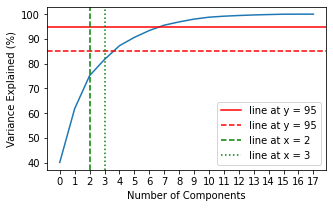

<Figure size 432x288 with 0 Axes>

In [214]:
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.array(range(numberOfComponents))
plt.figure(figsize =(5, 3))
plt.plot(x,y)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained (%)")
plt.axhline(y=95, color='r',label='line at y = {}'.format(95))
plt.axhline(y=85, color='r',label='line at y = {}'.format(95), linestyle ='--')
plt.axvline(x=2, color='g',label='line at x = {}'.format(2), linestyle='--')
plt.axvline(x=3, color='g',label='line at x = {}'.format(3), linestyle=':')
plt.xticks(np.arange(0, numberOfComponents, 1))
plt.legend()
plt.show()
plt.savefig("Climate PCA.png")


In [122]:
x_val = math.ceil(np.interp(95, y, x))
print ("x-axis value for explaining 95% data is ", x_val)

x-axis value for explaining 95% data is  7


Can see that around 7 PCs can define 95% of the data

Text(0, 0.5, 'Variance Explained (%)')

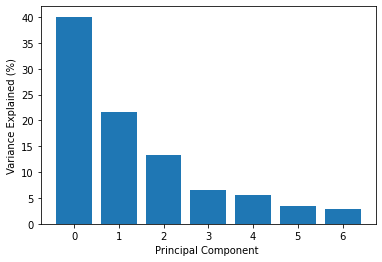

In [200]:
plt.bar (np.array(range(x_val)) ,pca.explained_variance_ratio_[0:x_val]*100)
plt.xlabel("Principal Component ")
plt.ylabel("Variance Explained (%)")

In [124]:
#pca.components_[0:x_val]

In [198]:
pca.components_ = pca.components_[0:x_val]
#transformedData = pca.transform(dataForPCA)
#plt.figure()
#plt.plot(transformedData[:,])

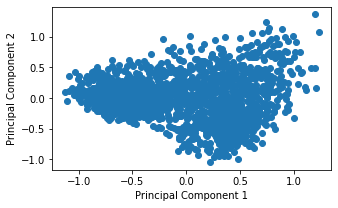

In [219]:
plt.figure(figsize =(5, 3))
plt.scatter(transformedData[:,0], transformedData[:,1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("Climate PC1 PC2.png")

<Figure size 432x288 with 0 Axes>

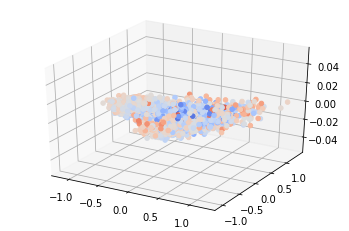

In [127]:
plot3D = plt.figure("10,10")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = transformedData[:,0]
y = transformedData[:,1]
z = transformedData[:,2]
c = np.random.standard_normal(len(transformedData))
img = ax.scatter(x, y, c=z, cmap='coolwarm', alpha=1)
plot3D.show()

In [128]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(x, y, z, cmap='viridis', edgecolor='none')
# ax.set_title('surface');

Plot data on new PC coordinate (2D? 3D? we got 7D)



### Working with original data- Why/not we can't do PCA on directly/ (optional)

In [129]:
data2 = climateDataBasel
pca2 = PCA( n_components =5)
pca2.fit(data2)
#comment on the amount of variance, interpretability and the link with the original features

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [130]:
transformedData2 = pca2.transform(data2)
plt.figure ( figsize =(6 ,4))
#plt.plot ( transformedData2 [: ,0] , transformedData2 [: ,1] ,".")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, ' Variance Explained (%)')

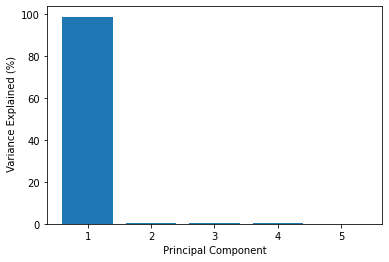

In [131]:
plt.figure ( figsize =(6 ,4))
plt.bar ([1 ,2 ,3 ,4,5] ,pca2.explained_variance_ratio_*100 , tick_label =[1 ,2 ,3 ,4,5])
plt.xlabel (" Principal Component ")
plt.ylabel (" Variance Explained (%)")


Here we see that, if we do not standardize our data, the Principal component analysis gives very wrong results since the component ranges will influence the creation of the components. The ranking of the components is very skewed as well as it shows that only one component can explain more than 90% of the data.

## **Local Anomalies**

## **End of Question 1**

# **Video Data Set**

## **0. Reading Data**

In [132]:
# Reading data
images_data = pd.read_csv("WLA.csv", header=None, names =["Width","Length", "Area"])
labels = pd.read_csv("Labels.csv", header=None, names =["Label"])

## **1. Missing values**

In [180]:
images_data.isnull().sum()

Width     0
Length    0
Area      0
dtype: int64

## *Plotting frames data*

To check if our data follows Gaussian distribution, we are plotting histograms for all the features, since there are only 3 features here.

In [ ]:
plt.figure()
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))
for i in range(3):
  ax[i].plot(images_data.iloc[:,i],"b.")
  ax[i].set_title("Plotting "+ images_data.columns[i]+ " data")

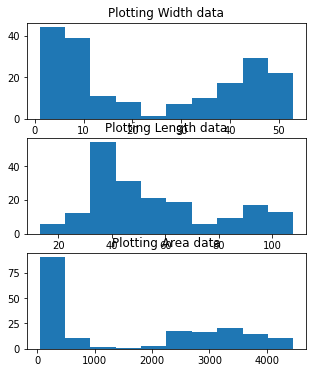

In [186]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,6))
for i in range(3):
  ax[i].hist(images_data.iloc[:,i])
  ax[i].set_title("Plotting "+ images_data.columns[i]+ " data")
plt.savefig("Video histograms.png")


As can be seen from the histograms for Length, Width and Area columns, the distribution is not Normal.

In [181]:
images_data.describe()

,Width,Length,Area
count,188.000000,188.000000,188.000000
mean,23.952128,55.367021,1621.968085
std,18.011667,24.053158,1512.415110
min,1.000000,13.000000,39.000000
25%,7.000000,38.000000,263.000000
50%,16.500000,46.500000,602.000000
75%,44.000000,69.000000,3020.250000
max,53.000000,108.000000,4464.000000


## **2. Standardization**

In [136]:
images_standard_df = standardization(images_data)

## **3. Global Outliers/ Anomaly Detection**

In [137]:
print (images_standard_df.applymap(lambda x: (x> 3 or x < -3)).sum())

Width     0
Length    0
Area      0
dtype: int64


The Z-score evaluation tell us that there are no outliers in this dataset. But we can use different density estimation methods like-  kernel density estimation (**KDE**) and the recursive density estimation (**RDE**) that can help in anomaly detection.

In [138]:
#from sklearn.neighbors import KernelDensity

## **4. Normalization**

In [139]:
images_normalized_df = normalization(images_data)

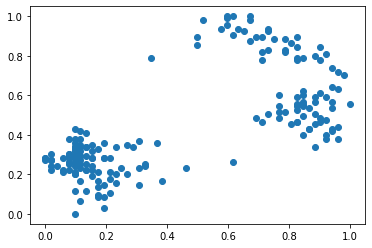

In [140]:
plt.figure()
plt.scatter(images_normalized_df["Width"], images_normalized_df["Length"])

## **5. Feature Selection** 

### **Correlation**

In [199]:
images_normalized_df.corr()
# write why we are using pearson's correlation -> assumptions, conditions 
#images_data.corr("kendall")

,Width,Length,Area
Width,1.000000,0.686441,0.929961
Length,0.686441,1.000000,0.887880
Area,0.929961,0.887880,1.000000


## **6. Feature Extraction**

If we consider video as a set of images, we can use FE methods that pertain to an individual image.

1.   CNN
2.   Histogram of Gradients

But for video data, this will be computationally very high. In video data, we can use the dependency of one frame on the other one.


### **PCA**

In [191]:
dataForPCA = images_standard_df
#print (dataForPCA.head())
pca_VideoData = PCA()
pca_VideoData.fit(dataForPCA)
pca_VideoData.explained_variance_

array([2.67380092, 0.31526081, 0.01093827])

In [143]:
images_standard_df.cov()

,Width,Length,Area
Width,1.000000,0.686441,0.929961
Length,0.686441,1.000000,0.887880
Area,0.929961,0.887880,1.000000


In [144]:
images_standard_df.corr()

,Width,Length,Area
Width,1.000000,0.686441,0.929961
Length,0.686441,1.000000,0.887880
Area,0.929961,0.887880,1.000000


Text(0, 0.5, 'Variance Explained (%)')

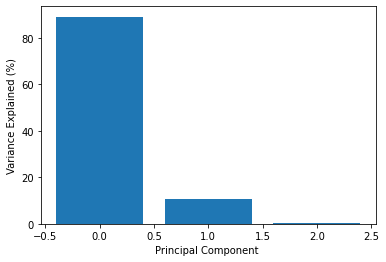

In [216]:
plt.bar (np.array(range(3)) ,pca_VideoData.explained_variance_ratio_[0:3]*100)
plt.xlabel("Principal Component ")
plt.ylabel("Variance Explained (%)")

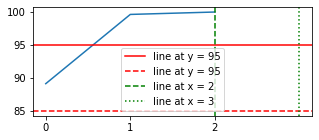

In [215]:
y = np.cumsum(pca_VideoData.explained_variance_ratio_ * 100)
numberOfComponents = 3
x = np.array(range(3))
plt.figure(figsize =(5, 2))
plt.plot(x,y)
plt.axhline(y=95, color='r',label='line at y = {}'.format(95))
plt.axhline(y=85, color='r',label='line at y = {}'.format(95), linestyle ='--')
plt.axvline(x=2, color='g',label='line at x = {}'.format(2), linestyle='--')
plt.axvline(x=3, color='g',label='line at x = {}'.format(3), linestyle=':')
plt.xticks(np.arange(0, numberOfComponents, 1))
plt.legend()
plt.show()


## **Using labels data**

In [146]:
labelled_data = pd.concat([images_data, labels], axis=1)
#labelled_data

### **RDE function declaration**

 The core of RDE is the data
density, which, if use Euclidean type of distance, has the form of Cauchy kernel
function as it was shown in Chap. 

In [147]:
def RDE(data):
    D = np.zeros(data.shape[0])
    MeanD = np.zeros(data.shape[0])
    VarD = np.zeros(data.shape[0])
    
    for pos in range (len(data)):
        k = pos+1   
        if (pos == 0):
            mean = data[0]
        else:
            mean = (1/k) * data[pos] + ((k-1)/k) * mean
        
        # get new std dev
        if (pos ==0):
            stdDev = np.dot( data [0] , data [0])
        else:
            stdDev = ((k - 1)/k) * stdDev + np.dot( data [pos], data [pos ])/k
        
        # get new RDE
        D[pos]= (1 / (1 +stdDev + ( (data [pos] - mean)*(data [pos] -mean) ) - (mean*mean)))
        
        # update mean
        
        if (pos == 0):
            MeanD [0] = D[0]
        else :
            MeanD [pos] = ((k - 1) / k) * MeanD [pos - 1] + (1/k) *D[pos]
            
        if (pos == 0):
            VarD [0] = 0
        else :
            VarD [pos ] = (((k - 1) / k) * VarD [pos - 1] )+ ((1/ k) *(D[pos] - MeanD [pos])*(D[pos] - MeanD [pos]))

    return D, MeanD , VarD

In [148]:
np.array(0)

array(0)

### **RDE plots**

In [149]:
labelled_data
cars_data = labelled_data[labelled_data["Label"] == 1]
bike_data = labelled_data[labelled_data["Label"] == 2]
print (len(cars_data), len(bike_data))

86 102


In [150]:
[Density, MeanD, VarD] = RDE(np.array(labelled_data["Area"]))
stdD = np.sqrt(VarD)

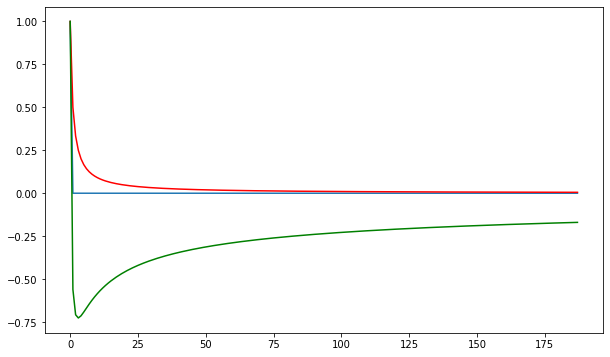

In [151]:
plt.figure(figsize=(10,6))
plt.plot(Density)
plt.plot(MeanD,'r')
plt.plot(MeanD - 3*stdD,'g')

In [152]:
np.array(cars_data["Area"])

array([2115, 2632, 2484, 2700, 2499, 2499, 2408, 2650, 2604, 2805, 2166,
       2419, 2401, 2295, 2508, 2379, 2484, 2183, 2700, 2944, 2665, 2508,
       1254, 2925, 2867, 2860, 2736, 2542, 2772, 2970, 2904, 2842, 3036,
       2870, 3200, 3015, 2832, 3150, 3149, 3498, 3408, 3700, 3723, 3240,
       3350, 3243, 3381, 4160, 4176, 3872, 1672, 3588, 4150, 3864, 3960,
       3822, 3626, 3880, 4092, 4183, 4085, 4464, 4074, 3939, 3724, 3978,
       4131, 4410, 4312, 3564, 3816, 3456, 3888, 3424, 3328, 3456, 3306,
       3162, 3535, 3458, 3468, 3267, 2968, 3828, 2646, 2538])

In [153]:
[Density, MeanD, VarD] = RDE(np.array(cars_data["Area"]))
stdD = np.sqrt(VarD)

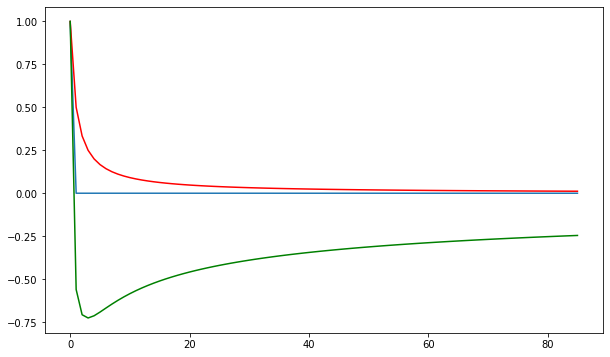

In [154]:
plt.figure(figsize=(10,6))
plt.plot(Density)
plt.plot(MeanD,'r')
plt.plot(MeanD - 3*stdD,'g')
